In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from sklearn.metrics.cluster import silhouette_score

In [2]:
data = pd.read_csv('naver_news.csv')

In [3]:
data.head()

,Unnamed: 0,URL,제목,내용
0,0,https://news.naver.com/main/ranking/read.nhn?r...,“명품백 멘 성매매 여성들에게 영원히 사과 않겠다”,‘성매매 여성 자활 지원 소신 발언’ 홍준연 대구시 중구의원 인터뷰홍준연 대구시 중...
1,1,https://news.naver.com/main/ranking/read.nhn?r...,에쿠스 음주운전하다 강물 빠지자 몸만 빼내 집에 가버린 40대,28일 오전 7시24분쯤 부산 강서구 명지동에서 맥도강에 승용차가 빠져있다 는 1...
2,2,https://news.naver.com/main/ranking/read.nhn?r...,“여아 성 상품화 하지마세요” 소비자 경악케 한 아동 속옷 착용컷,아동 속옷 착용컷을 선정적으로 표현하는 쇼핑몰에 대한 관리·감독이 필요하다는 청원이...
3,3,https://news.naver.com/main/ranking/read.nhn?r...,"방향타 잃은 화물선, 광안대교 돌진…안전 확보될 때까지 통제(종합3보)",부산시 전문가 안전진단 결과 나오는 3일까지 차량통행 부분 제한선장 알코올농도 면...
4,4,https://news.naver.com/main/ranking/read.nhn?r...,‘승리 생일파티’ 논란된 날 버닝썬 제보자 “12월에 클럽 찾아갔더니…”,이하 김씨 인스타그램그룹 빅뱅의 승리가 과거 필리핀에서 논란의 여지가 있는 생일파티...


In [4]:
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,URL,제목,내용
0,https://news.naver.com/main/ranking/read.nhn?r...,“명품백 멘 성매매 여성들에게 영원히 사과 않겠다”,‘성매매 여성 자활 지원 소신 발언’ 홍준연 대구시 중구의원 인터뷰홍준연 대구시 중...
1,https://news.naver.com/main/ranking/read.nhn?r...,에쿠스 음주운전하다 강물 빠지자 몸만 빼내 집에 가버린 40대,28일 오전 7시24분쯤 부산 강서구 명지동에서 맥도강에 승용차가 빠져있다 는 1...
2,https://news.naver.com/main/ranking/read.nhn?r...,“여아 성 상품화 하지마세요” 소비자 경악케 한 아동 속옷 착용컷,아동 속옷 착용컷을 선정적으로 표현하는 쇼핑몰에 대한 관리·감독이 필요하다는 청원이...
3,https://news.naver.com/main/ranking/read.nhn?r...,"방향타 잃은 화물선, 광안대교 돌진…안전 확보될 때까지 통제(종합3보)",부산시 전문가 안전진단 결과 나오는 3일까지 차량통행 부분 제한선장 알코올농도 면...
4,https://news.naver.com/main/ranking/read.nhn?r...,‘승리 생일파티’ 논란된 날 버닝썬 제보자 “12월에 클럽 찾아갔더니…”,이하 김씨 인스타그램그룹 빅뱅의 승리가 과거 필리핀에서 논란의 여지가 있는 생일파티...


In [5]:
content = data['내용']

In [6]:
len(content)

1721

In [7]:
content[0]

'‘성매매 여성 자활 지원 소신 발언’ 홍준연 대구시 중구의원 인터뷰홍준연 대구시 중구의원. 페이스북  성매매 여성 자활 지원에 대한 소신 발언으로 논란을 겪은 홍준연 대구시 중구의원은 28일 국민일보와의 전화통화에서 “성매매 여성들은 범법자이며 이들을 위해 시민들이 낸 세금은 단 한 푼도 쓸 수 없다는 소신을 굽히지 않을 것”이라고 밝혔다.그는 “성매매로 피해를 본 여성을 위하는 정책이라면 100  지지하겠지만 명품 백을 메고 좋은 옷을 걸치고 다니는 자발적 성매매 여성들까지 세금으로 지원할 수는 없는 노릇”이라면서 “불법 성매매로 이득을 취한 이들에게는 영원히 사과하지 않을 것”이라고 강조했다.홍 구의원은 시민들이 낸 예산을 편성하고 집행하고 감독하는 구의원으로서 세금이 허투루 쓰이는 일은 두고 볼 수 없었다고 주장했다.그는 “현행법인 성매매방지법에 따라 성매매 여성들은 분명한 범법자이며 번 돈에 대한 세금조차 한 푼 내지 않는 사람들”이라면서 “이런 성매매 여성들을 위해 어떻게 시민들이 낸 피 같은 세금을 쓸 수 있느냐. 그건 절대로 용납할 수 없는 이야기”라고 말했다.문재인 대통령 왼쪽 과 홍준연 대구시 중구의원. 페이스북 홍 구의원은 지난해 12월 20일 제253회 중구의회 제2차 정례회 제4차 본회의에서 성매매 여성들의 자활지원금을 놓고 류규하 중구청장과 언쟁을 벌였다.그는 성매매 자활대상자 41명에게 생계 및 주거 명목으로 시비 8억2000만원을 지원하자는 것은 국민 세금이며 토지개발에 방해가 되는 성매매 종사자를 처리하고 싶어 하는 성매매 사업자와 토지개발업자  대구시 공무원의 농간으로 이루어진 정책이라고 비판했다.홍 구의원은 아울러 “세 살 버릇 여든까지 간다는 말처럼 쉽게 돈 번 분들이 2000만원을 받고 난 뒤 다시 성매매를 안 한다는 확신도 없지 않느냐”고 지적했다.문재인 대통령 오른쪽 과 홍준연 대구시 중구의원. 페이스북 발언이 알려지자 여성단체 등은 홍 구의원을 거세게 비판했다. 민주당 대구시당 여성의원 일동도 “당 강령과 윤리규범  

### 품사 태깅

In [8]:
import konlpy.tag
from tqdm import tqdm_notebook

In [9]:
komoran = konlpy.tag.Komoran()
komoran_morphs = []
for i in tqdm_notebook(range(len(content))):
    komoran_morph = komoran.pos(content[i])
    komoran_morphs.append(komoran_morph)
    


100%|██████████████████████████████████████████████████████████████████████████████| 1721/1721 [02:16<00:00, 12.61it/s]


In [10]:
len(komoran_morphs)

1721

In [11]:
komoran_morphs[0]

[('‘', 'SS'),
 ('성매매', 'NNP'),
 ('여성', 'NNG'),
 ('자활', 'NNG'),
 ('지원', 'NNG'),
 ('소신', 'NNP'),
 ('발언', 'NNG'),
 ('’', 'SS'),
 ('홍주', 'NNP'),
 ('ㄴ', 'JX'),
 ('열', 'VV'),
 ('ㄴ', 'ETM'),
 ('대구시', 'NNP'),
 ('중구', 'NNP'),
 ('의원', 'NNP'),
 ('인터뷰', 'NNP'),
 ('홍주', 'NNP'),
 ('ㄴ', 'JX'),
 ('열', 'VV'),
 ('ㄴ', 'ETM'),
 ('대구시', 'NNP'),
 ('중구', 'NNP'),
 ('의원', 'NNP'),
 ('.', 'SF'),
 ('페이스북', 'NNP'),
 ('성매매', 'NNP'),
 ('여성', 'NNG'),
 ('자활', 'NNG'),
 ('지원', 'NNG'),
 ('에', 'JKB'),
 ('대하', 'VV'),
 ('ㄴ', 'ETM'),
 ('소신', 'NNP'),
 ('발언', 'NNG'),
 ('으로', 'JKB'),
 ('논란', 'NNG'),
 ('을', 'JKO'),
 ('겪', 'VV'),
 ('은', 'ETM'),
 ('홍주', 'NNP'),
 ('ㄴ', 'JX'),
 ('열', 'VV'),
 ('ㄴ', 'ETM'),
 ('대구시', 'NNP'),
 ('중구', 'NNP'),
 ('의원', 'NNP'),
 ('은', 'JX'),
 ('28', 'SN'),
 ('일', 'NNB'),
 ('국민일보', 'NNP'),
 ('와', 'JKB'),
 ('의', 'JKG'),
 ('전화통', 'NNG'),
 ('화', 'XSN'),
 ('에서', 'JKB'),
 ('“', 'SS'),
 ('성매매', 'NNP'),
 ('여성', 'NNG'),
 ('들', 'XSN'),
 ('은', 'JX'),
 ('범법자', 'NNG'),
 ('이', 'VCP'),
 ('며', 'EC'),
 ('이', 'NP'),
 ('들', '

### 명사 추출

In [12]:
nouns = []
for i in tqdm(range(len(komoran_morphs))):
    noun = []
    for j in range(len(komoran_morphs[i])):
        if 'NN' in komoran_morphs[i][j][1]:
            noun.append(komoran_morphs[i][j][0])
    nouns.append(noun)

100%|████████████████████████████████████████████████████████████████████████████| 1721/1721 [00:00<00:00, 2201.02it/s]


In [13]:
len(nouns)

1721

In [14]:
nouns[0]

['성매매',
 '여성',
 '자활',
 '지원',
 '소신',
 '발언',
 '홍주',
 '대구시',
 '중구',
 '의원',
 '인터뷰',
 '홍주',
 '대구시',
 '중구',
 '의원',
 '페이스북',
 '성매매',
 '여성',
 '자활',
 '지원',
 '소신',
 '발언',
 '논란',
 '홍주',
 '대구시',
 '중구',
 '의원',
 '일',
 '국민일보',
 '전화통',
 '성매매',
 '여성',
 '범법자',
 '시민',
 '세금',
 '푼',
 '수',
 '소신',
 '것',
 '성매매',
 '피해',
 '여성',
 '정책',
 '지지',
 '명품',
 '옷',
 '자발',
 '성매매',
 '여성',
 '세금',
 '지원',
 '수',
 '노릇',
 '불법',
 '성매매',
 '이득',
 '사과',
 '것',
 '강조',
 '홍',
 '의원',
 '시민',
 '예산',
 '편성',
 '집행',
 '감독',
 '의원',
 '세금',
 '허',
 '투',
 '일',
 '수',
 '주장',
 '현행법',
 '성매매',
 '방지법',
 '성매매',
 '여성',
 '범법자',
 '번',
 '돈',
 '세금',
 '사람',
 '성매매',
 '여성',
 '시민',
 '피',
 '세금',
 '수',
 '용납',
 '수',
 '이야기',
 '말',
 '문재인',
 '대통령',
 '왼쪽',
 '과',
 '홍주',
 '대구시',
 '중구',
 '의원',
 '페이스북',
 '홍',
 '의원',
 '지난해',
 '12월 20일',
 '회',
 '중구',
 '의회',
 '차',
 '정례',
 '회',
 '차',
 '본회의',
 '성매매',
 '여성',
 '자활',
 '지원금',
 '류규',
 '하',
 '중구청',
 '장과',
 '언쟁',
 '성매매',
 '자활',
 '대상자',
 '명',
 '생계',
 '주거',
 '명목',
 '시비',
 '만원',
 '지원',
 '것',
 '국민',
 '세금',
 '토지',
 '개발',
 '방해',
 '성매매',
 '종사자'

### kornounextractor를 이용한 명사 추출

In [15]:
from kornounextractor.noun_extractor import extract

In [16]:
set_nouns = []
for i in tqdm(range(len(content))):
    set_nouns.append(extract(content[i],freq = 2.0))

100%|██████████████████████████████████████████████████████████████████████████████| 1721/1721 [04:43<00:00, 10.83it/s]


In [17]:
set_nouns[0]

['여성',
 '페이스북',
 '정책',
 '제명안',
 '중구의원',
 '성매매',
 '민주당',
 '예산',
 '상식',
 '세금',
 '국민',
 '대구시',
 '신청',
 '여성의원',
 '대통령',
 '이득',
 '지원',
 '제명',
 '사람',
 '자신',
 '결정',
 '정치',
 '응원',
 '자발',
 '여성단체',
 '발언',
 '불법',
 '토지개발',
 '피해',
 '홍주',
 '구의원',
 '소신',
 '공격',
 '범법자',
 '왼쪽',
 '재심',
 '대구시당',
 '시민',
 '문재인',
 '중앙당']

In [18]:
all_nouns = []
for i in set_nouns:
    for j in i:
        all_nouns.append(j)
all_nouns = list(set(all_nouns))

In [19]:
all_nouns[:50]

['지방',
 '대위',
 '전무',
 '이종원',
 '게시물',
 '입증',
 '기생',
 '충남',
 '긴급조치',
 '성악',
 '발부',
 '벌금형',
 '채취',
 '술집',
 '상남자',
 '소등',
 '포착',
 '통영',
 '대처',
 '대물림',
 '청담동',
 '스타필드',
 '부산지역',
 '생일파티',
 '출신',
 '빚투',
 '서식',
 '웨이터',
 '보호하',
 '표준량',
 '이스탄불',
 '부문',
 '소설책',
 '현대',
 '인파',
 '고소사건',
 '김동민',
 '엄두',
 '자비',
 '복원',
 '질병관리본부',
 '황세먼지',
 '삼성',
 '오죽',
 '위자료',
 '사쿠',
 '설명',
 '임명애',
 'SM',
 '여행']

In [20]:
len(all_nouns)

10932

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

### 불용어 제거

In [22]:
vec = CountVectorizer(vocabulary=all_nouns).fit(content)
bag_of_words = vec.transform(content)
sum_words = bag_of_words.sum(axis=0)

In [23]:
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [24]:
words_freq

[('기자', 2477),
 ('서울', 1640),
 ('경찰', 1486),
 ('마약', 1433),
 ('연합뉴스', 1211),
 ('오후', 1186),
 ('네이버', 1185),
 ('금지', 1049),
 ('재배포', 1027),
 ('오전', 883),
 ('채널', 866),
 ('투약', 769),
 ('수사', 764),
 ('사진', 746),
 ('뉴스', 744),
 ('가수', 708),
 ('사건', 666),
 ('무단전재', 638),
 ('정준영', 590),
 ('오늘', 581),
 ('승리', 573),
 ('불법', 559),
 ('최근', 541),
 ('동영상', 540),
 ('클럽', 510),
 ('현재', 492),
 ('무단', 479),
 ('해당', 473),
 ('앵커', 464),
 ('일부', 447),
 ('조사', 442),
 ('중앙일보', 438),
 ('피해', 432),
 ('구속', 431),
 ('혐의', 419),
 ('카카오톡', 396),
 ('배우', 389),
 ('여성', 385),
 ('결과', 381),
 ('박유천', 375),
 ('피의자', 365),
 ('검찰', 361),
 ('의혹', 348),
 ('위반', 348),
 ('뉴시스', 338),
 ('여러', 335),
 ('황하나', 329),
 ('미세먼지', 327),
 ('성접대', 317),
 ('유착', 309),
 ('저작권자', 308),
 ('올해', 303),
 ('아파트', 301),
 ('징역', 300),
 ('장자연', 298),
 ('제공', 288),
 ('사람이', 287),
 ('과거', 275),
 ('성매매', 273),
 ('영상', 272),
 ('경기도', 269),
 ('페이스북', 258),
 ('성관계', 257),
 ('뉴스1', 256),
 ('촬영', 255),
 ('범행', 254),
 ('실제', 247),
 ('연예인', 243),
 ('홈페이지'

In [25]:
stopwords = ['기자', '최근', '당시', '뉴스', '네이버', '메인', '채널', '구독', '국민일보','뉴시스', '앵커'
             '재배포','캡처', '무단전재', '사람이', '중앙일보','금지','제공', '취재대행소','인턴기자' ,'서울경제',
            '뉴스1','조선일보','아시아경제', '이데일리', '서울신문','미디어','경향신문','영상취재','뉴스데스크',
            '오마이뉴스','노컷뉴스','아이뉴스24','헤럴드경제','뉴스룸']

In [26]:
for noun in all_nouns:
    if noun in stopwords:
        all_nouns.remove(noun)

In [27]:
len(all_nouns)

10902

In [28]:
all_nouns

['지방',
 '대위',
 '전무',
 '이종원',
 '게시물',
 '입증',
 '기생',
 '충남',
 '긴급조치',
 '성악',
 '발부',
 '벌금형',
 '채취',
 '술집',
 '상남자',
 '소등',
 '포착',
 '통영',
 '대처',
 '대물림',
 '청담동',
 '스타필드',
 '부산지역',
 '생일파티',
 '출신',
 '빚투',
 '서식',
 '웨이터',
 '보호하',
 '표준량',
 '이스탄불',
 '부문',
 '소설책',
 '현대',
 '인파',
 '고소사건',
 '김동민',
 '엄두',
 '자비',
 '복원',
 '질병관리본부',
 '황세먼지',
 '삼성',
 '오죽',
 '위자료',
 '사쿠',
 '설명',
 '임명애',
 'SM',
 '여행',
 '체력',
 '진정입법부작위',
 '검은색',
 '보험사기',
 '소름',
 '고구마',
 '언덕',
 '배포',
 '무기력',
 '관계부처',
 '양식장',
 '치료자',
 '투척',
 '정직',
 '너머',
 '무더기',
 '홍인기',
 '동쪽지역',
 '원대',
 '자살',
 '김어진',
 '습관',
 '연합뉴스',
 '나열',
 '돈거래',
 '성의',
 '문화체육관광위원회',
 '극장',
 '허효진',
 '허위인지',
 '오후',
 '버그',
 '조선독립신문',
 '이탈',
 '민족대표',
 '살균제',
 '정전기',
 'TV리포트',
 '동일인',
 '관여',
 '조사단',
 '판매상',
 '훼손',
 '김선미',
 '동업자',
 '전화',
 '고령',
 '학교마',
 '춘천시',
 '테이블',
 '수확',
 '우먼센스',
 '도포',
 '대응방식',
 '결과',
 '천남리',
 '무장대',
 '주머니',
 '대중운동',
 '가량',
 '퍼퓸',
 '문재인',
 '김지윤',
 '오신',
 '명시',
 '컨설팅',
 '신장',
 '소방청장',
 '시아버지',
 '전신',
 'SKY서성',
 '항소심',
 '장자연',
 '혼자사',
 '오토파일럿',
 '노력',
 '다음달',
 '활

### TF-IDF Vectorizing

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM
def tfidf_extractor(corpus):
    # returns a tf-idf based DTM
    vectorizer = TfidfVectorizer(min_df=1, 
                                 ngram_range=(1,1),vocabulary=all_nouns)
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

In [30]:
vectorizer_tfidf, DTM_tfidf = tfidf_extractor(content) 
DTM_TFIDF = np.array(DTM_tfidf.todense())

In [31]:
DTM_TFIDF

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
DTM_TFIDF.shape

(1721, 10902)

### K-means

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=10)
clusters = kmeans.fit_predict(DTM_TFIDF) # KMeans 알고리즘으로 학습
clusters

array([0, 0, 0, ..., 1, 0, 0])

In [44]:
unique, counts = np.unique(clusters, return_counts=True)
dict(zip(unique, counts))

{0: 1261, 1: 203, 2: 257}

In [45]:
from matplotlib import pyplot as plt

### elbow method

In [42]:
number_clusters = range(1, 31)
kmeans_list = []
for i in number_clusters:
    kmeans_list.append(KMeans(n_clusters=i))
scores = []
for i in tqdm_notebook(range(len(kmeans_list))):
    scores.append(kmeans_list[i].fit(DTM_TFIDF).score(DTM_TFIDF))
    # score = - sum of sq
    # score indicates the variance explained by the clusters


NameError: name 'KMeans' is not defined

Text(0, 0.5, 'Score')

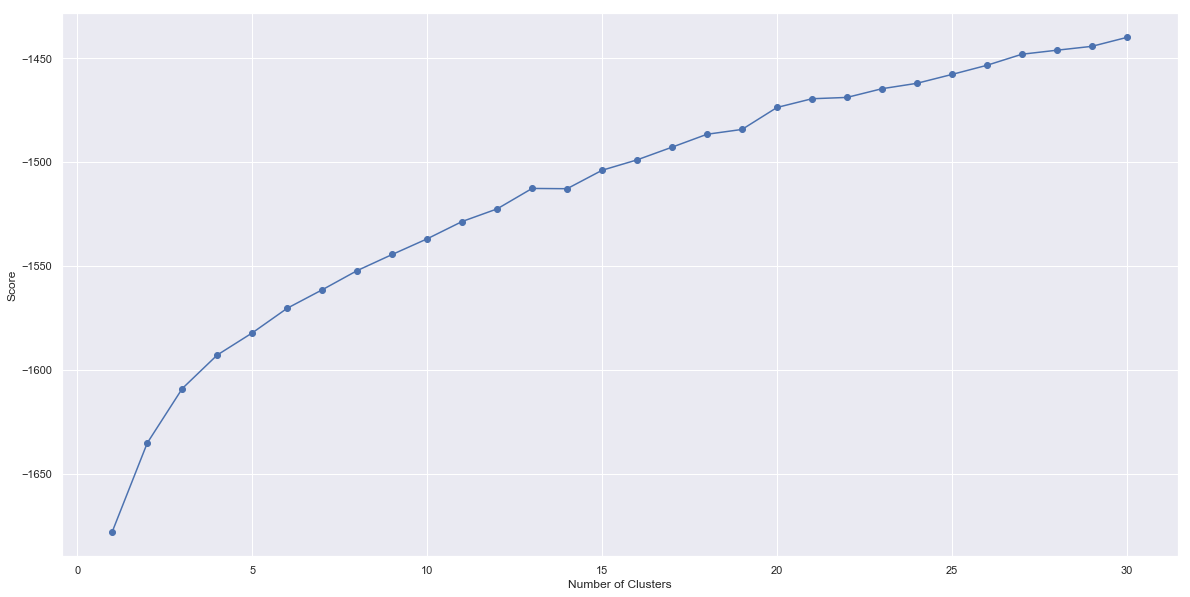

In [47]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(number_clusters,scores, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
## 적정값: 20로 판단됨


In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, max_iter=10)
clusters = kmeans.fit_predict(DTM_TFIDF)
clusters

array([ 1,  4, 15, ..., 13,  4,  6])

In [36]:
unique, counts = np.unique(clusters, return_counts=True)
dict(zip(unique, counts))

{0: 15,
 1: 344,
 2: 71,
 3: 29,
 4: 258,
 5: 75,
 6: 14,
 7: 84,
 8: 42,
 9: 72,
 10: 112,
 11: 50,
 12: 40,
 13: 28,
 14: 33,
 15: 175,
 16: 45,
 17: 86,
 18: 45,
 19: 103}

In [63]:
data['k-means'] = clusters


In [155]:
data[data['k-means'] == 9]
#0: 버닝썬/경찰
#1: 정준영
#2: 황하나
#3: 날씨/미세먼지
#4: 이명박/박근혜
#18: 기타

,URL,제목,내용,k-means,HC
113,https://news.naver.com/main/ranking/read.nhn?r...,"""새벽까지 술먹느냐"" 잔소리에 사장 살해한 알바생들",뉴시스 새벽까지 술을 마시냐며 잔소리했다는 이유로 돌봐주던...,9,0
241,https://news.naver.com/main/ranking/read.nhn?r...,“다른 남자도 만났다” 위증 회유 폭로한 도도맘에 반격한 강용석,유명 블로거 ‘도도맘’ 김미나 37 씨가 강용석 50 변호사로부터 위증을 청탁받았...,9,0
351,https://news.naver.com/main/ranking/read.nhn?r...,"“안 나오면 후회한다” 협박에…영광 여고생, 사망 1달 전에도 성폭행 피해",이하 KBS 제보자들 전남 영광에서 발생한 여고생 성폭행 사망사건의 가해자가 범행...,9,0
412,https://news.naver.com/main/ranking/read.nhn?r...,80대 본처와 70대 후처 52년 기구한 인연…살인으로 비극적 결말,본처 살해 후처 1심 징역 6년…2심 최후 진술서 하염없이 눈물만 춘천 연합뉴스 ...,9,0
575,https://news.naver.com/main/ranking/read.nhn?r...,"“SNS만 들어오면 파이터”… ‘도도맘’ 김미나, 1심서 벌금 200만원",주부 블로거의 명예를 훼손한 혐의로 재판에 넘겨진 도도맘 김미나 37 씨가 선고...,9,0
667,https://news.naver.com/main/ranking/read.nhn?r...,후배 부탁에 몰락한 은행원..남은건 100억 빚과 전과자 낙인뿐,클릭 이 사건 사진 픽사베이 피고는 원고에게 105억6899만원을...,9,0
679,https://news.naver.com/main/ranking/read.nhn?r...,"[클릭 이사건] 후배 부탁 거절 못해 몰락한 은행원, 남은 건 100억원대 빚과 전...",픽사베이 제공 피고는 원고에게 105억6899만원...,9,0
744,https://news.naver.com/main/ranking/read.nhn?r...,“그렇게 나는 48세에 또 성폭력을 당했다”,ㆍ이윤택 극단 피해자 증언 “거절 땐 안무 못할까 무기력”ㆍ검찰 상습 성추행 혐의...,9,0
792,https://news.naver.com/main/ranking/read.nhn?r...,“가슴 만져도 놀라지 말아라” 교주 정명석의 수상한 ‘건강검진’,기독교복음선교회 JMS 교주 정명석씨 붉은 점선 안 가 지난해 2월 18일 대전 ...,9,0
825,https://news.naver.com/main/ranking/read.nhn?r...,"입 속에 침 뱉고, 허리띠로 때리고… 78분 간 고문 당한 ‘인천 추락사’ 중학생",“폭행과 사망 사이 인과관계 없다” 주장도게티이미지뱅크또래 중학생에게 가혹행위 및 ...,9,0


In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
PCA_fit = pca.fit_transform(DTM_TFIDF)

In [46]:
PCA_df = pd.DataFrame(PCA_fit)
PCA_df['k-means'] = clusters
PCA_df.columns = ['x', 'y', 'z', 'k-means']

In [ ]:
PCA_df.head()

In [41]:
from mpl_toolkits.mplot3d import Axes3D


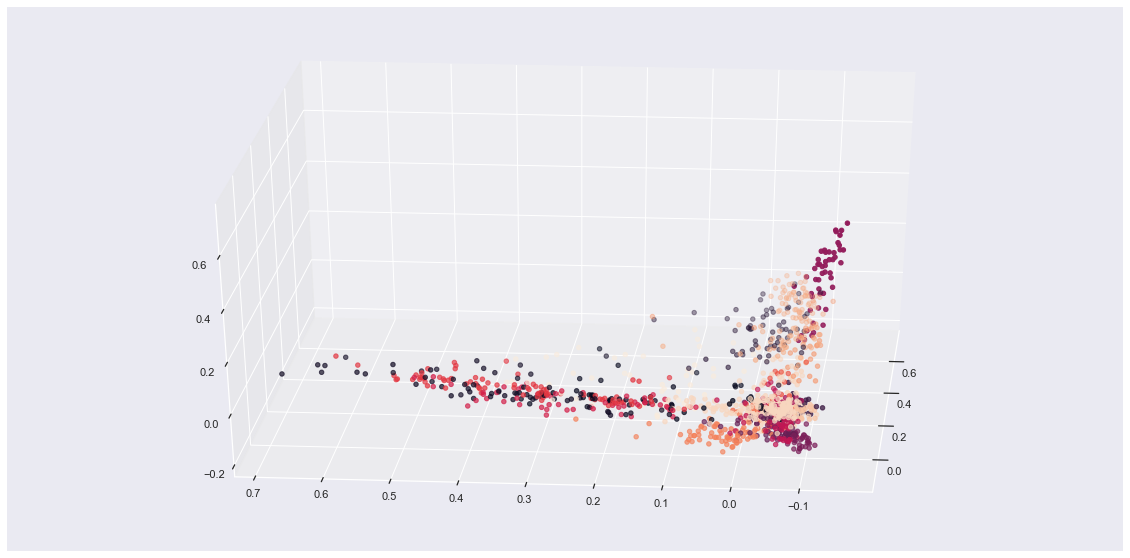

In [69]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_df['x'], PCA_df['y'], PCA_df['z'],c = PCA_df['k-means'], marker = 'o')
ax.view_init(30, 185)
plt.show()

### Hierarchical clustering

In [194]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import silhouette_score

In [195]:
clustering1 = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=20).fit(DTM_TFIDF)
clustering1.labels_

array([ 5,  4,  4, ..., 13,  3,  4], dtype=int64)

In [93]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

In [94]:
unique, counts = np.unique(clustering1.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 849,
 1: 87,
 2: 44,
 3: 30,
 4: 70,
 5: 22,
 6: 103,
 7: 31,
 8: 50,
 9: 28,
 10: 20,
 11: 40,
 12: 59,
 13: 86,
 14: 115,
 15: 30,
 16: 11,
 17: 21,
 18: 10,
 19: 15}

In [38]:
PCA_df['HC'] = clustering1.labels_
PCA_df.head()

NameError: name 'clustering1' is not defined

### LInkage 찾기

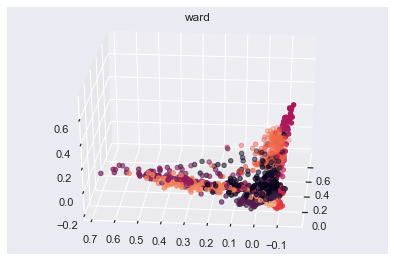

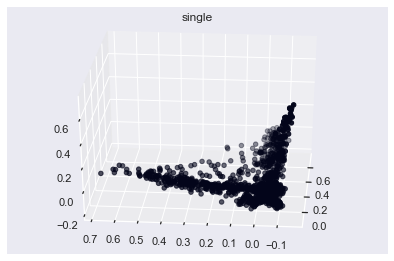

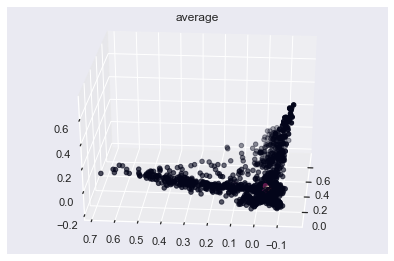

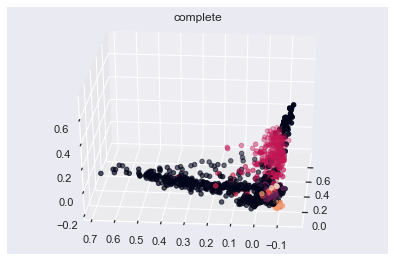

In [97]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(PCA_df['x'], PCA_df['y'], PCA_df['z'],c = PCA_df['HC'], marker = 'o')
ax.view_init(30, 185)
plt.title('ward')
plt.show()

clustering1 = AgglomerativeClustering(linkage='single', affinity='cosine', n_clusters=20).fit(DTM_TFIDF)
PCA_df['HC'] = clustering1.labels_
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(222, projection='3d')
ax.scatter(PCA_df['x'], PCA_df['y'], PCA_df['z'],c = PCA_df['HC'], marker = 'o')
ax.view_init(30, 185)
plt.title('single')
plt.show()


clustering1 = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=20).fit(DTM_TFIDF)
PCA_df['HC'] = clustering1.labels_
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(223, projection='3d')
ax.scatter(PCA_df['x'], PCA_df['y'], PCA_df['z'],c = PCA_df['HC'], marker = 'o')
ax.view_init(30, 185)
plt.title('average')
plt.show()

clustering1 = AgglomerativeClustering(linkage='complete', affinity='cosine', n_clusters=20).fit(DTM_TFIDF)
PCA_df['HC'] = clustering1.labels_
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(224, projection='3d')
ax.scatter(PCA_df['x'], PCA_df['y'], PCA_df['z'],c = PCA_df['HC'], marker = 'o')
ax.view_init(30, 185)
plt.title('complete')
plt.show()

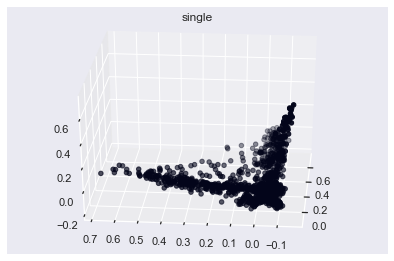

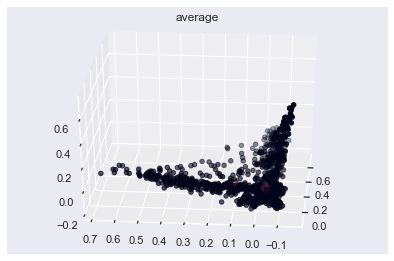

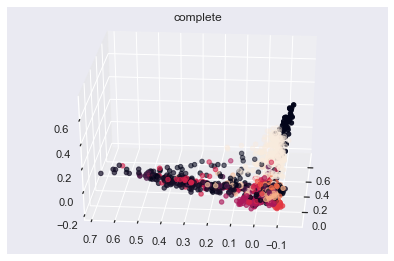

In [98]:
clustering1 = AgglomerativeClustering(linkage='single', affinity='euclidean', n_clusters=20).fit(DTM_TFIDF)
PCA_df['HC'] = clustering1.labels_
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(222, projection='3d')
ax.scatter(PCA_df['x'], PCA_df['y'], PCA_df['z'],c = PCA_df['HC'], marker = 'o')
ax.view_init(30, 185)
plt.title('single')
plt.show()


clustering1 = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=20).fit(DTM_TFIDF)
PCA_df['HC'] = clustering1.labels_
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(223, projection='3d')
ax.scatter(PCA_df['x'], PCA_df['y'], PCA_df['z'],c = PCA_df['HC'], marker = 'o')
ax.view_init(30, 185)
plt.title('average')
plt.show()

clustering1 = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=20).fit(DTM_TFIDF)
PCA_df['HC'] = clustering1.labels_
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(224, projection='3d')
ax.scatter(PCA_df['x'], PCA_df['y'], PCA_df['z'],c = PCA_df['HC'], marker = 'o')
ax.view_init(30, 185)
plt.title('complete')
plt.show()

### Dendrogram

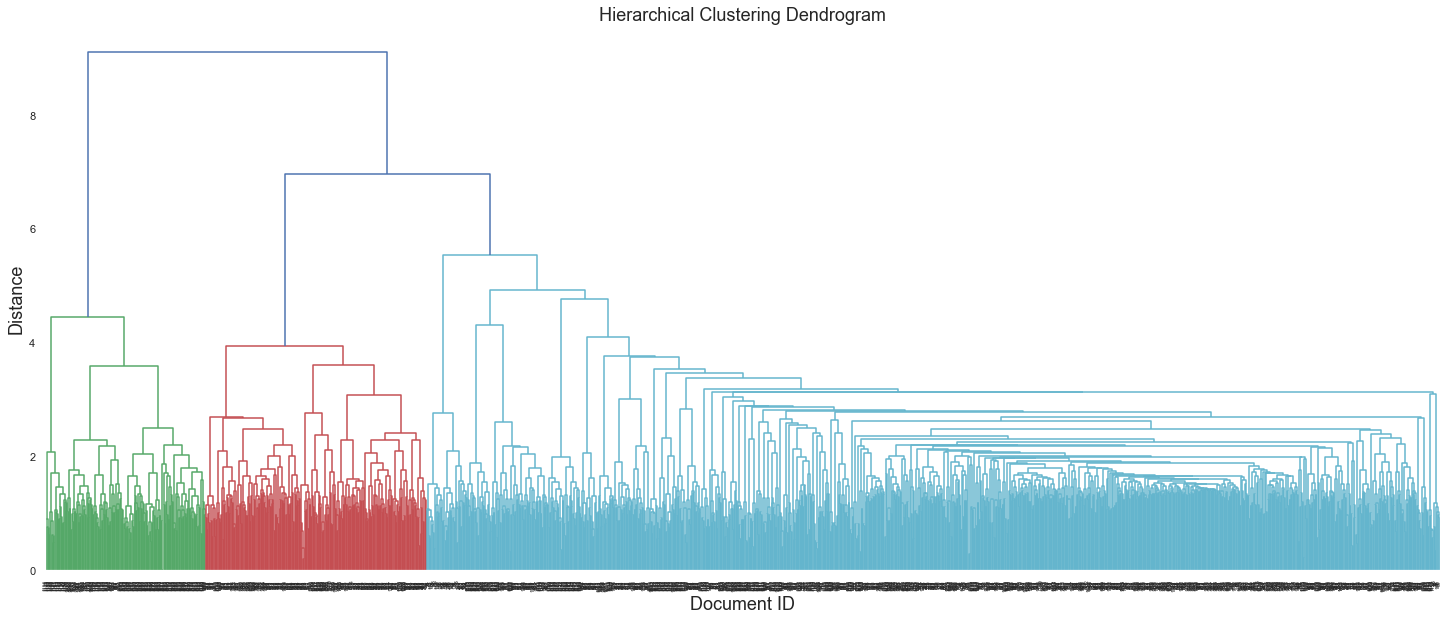

In [199]:
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)
Z = linkage(DTM_TFIDF, 'ward', metric='euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram', fontsize=18)
plt.xlabel('Document ID', fontsize=18)
plt.ylabel('Distance', fontsize=18)
dendrogram(
    Z
 # font size for the x axis labels
)
plt.show()

In [200]:
clustering1 = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=17).fit(DTM_TFIDF)
PCA_df['HC'] = clustering1.labels_
unique, counts = np.unique(clustering1.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 912,
 1: 112,
 2: 44,
 3: 30,
 4: 117,
 5: 44,
 6: 69,
 7: 50,
 8: 21,
 9: 70,
 10: 20,
 11: 40,
 12: 101,
 13: 28,
 14: 11,
 15: 30,
 16: 22}

In [202]:
clustering1.labels_

array([ 5,  0,  0, ..., 13,  3,  0], dtype=int64)

In [203]:
data['HC'] = PCA_df['HC']
data.sort_values(["HC"])

,URL,제목,내용,HC
860,https://news.naver.com/main/ranking/read.nhn?r...,"""삼촌 싫어"" 한마디에…여자친구 아들 폭행한 20대 남성",동영상 뉴스 앵커 이렇게 한 생명이 아무 죄 없이 세상을 떠나는 일도 받아들이기 어...,0
892,https://news.naver.com/main/ranking/read.nhn?r...,“몇 백원이 뭐라고”… 빈병 보증금은 ‘못 먹는 떡’?,스토리세계 ‘빛 좋은 개살구’ 공병반환보증금 제도 근처 편의점에 빈병을 반...,0
889,https://news.naver.com/main/ranking/read.nhn?r...,비틀비틀 '좀비' 운전..시민들이 달려들어 키 뽑고 급브레이크,동영상 뉴스 뉴스데스크 ◀ 앵커 ▶음주운전 처벌을 강화하는 윤창호법 이 시행된 이...,0
887,https://news.naver.com/main/ranking/read.nhn?r...,전국 대학가에 '김정은 서신' 표방 대자보…경찰청 내사 착수(종합2보),현 정부 정책 비판…6일 마로니에공원 촛불집회 참여 독려하기도경찰청 전담부서 지정·...,0
886,https://news.naver.com/main/ranking/read.nhn?r...,조두순 24시간 감시할 전자발찌… 80가지 징후로 성범죄 사전대응,법무부 ‘범죄 징후 예측시스템’ 도입 서울신문 성범죄자 범행 전 유사패턴 반복 포착...,0
885,https://news.naver.com/main/ranking/read.nhn?r...,실험구간 스마트폰 힐끔 보다 ‘쿵’… 무사고 10년 기자도 못 피했다,생명운전 1000명을 살린다 3 ‘운전중 딴짓’ 안전불감증 여전5일 경북 상주...,0
883,https://news.naver.com/main/ranking/read.nhn?r...,"SK·현대가 3세, '마약구매' 입건...""부유층 더 연루""",동영상 뉴스 앵커 SK와 현대가 3세가 마약을 구매한 혐의로 잇따라 경찰에 입건됐습...,0
893,https://news.naver.com/main/ranking/read.nhn?r...,"경찰 ""윤지오 보호 소홀 사과…특별팀 구성해 24시간 경호""",가장 높은 수준의 보호 장치…경정급 포함 여경 5명이 24시간 교대 담당 경찰관 ...,0
880,https://news.naver.com/main/ranking/read.nhn?r...,"""남자만 오세요""… 북적이는 필리핀 섹스 관광지",머니투데이 이재은 기자 편집자주 세계화 시대 세계 각국의 다양한 이야기를 ...,0
878,https://news.naver.com/main/ranking/read.nhn?r...,"""바나나는 속비닐 안돼요""…비닐봉투 금지 첫날 혼란 여전",과일·야채용 속비닐까지 엄격 제한하자 왜 안되느냐 항의도 바나나는 속비닐 ...,0


In [208]:
data[data['HC']==3]
#1번: 버닝썬/박유천
#2: 날씨
#3: 전두환/의붓딸 살해
#4~11까지는 비교적 단일 주제

,URL,제목,내용,HC
226,https://news.naver.com/main/ranking/read.nhn?r...,"알츠하이머라 못 나온다더니…""끌려가느니 자진 출석""",동영상 뉴스 앵커 전두환 씨가 광주에 가는 것은 지난 1988년 대통령 자리에서 물...,3
246,https://news.naver.com/main/ranking/read.nhn?r...,"""헬기사격 없었다"" 명예훼손 처벌?…'전두환 재판' 쟁점",동영상 뉴스 앵커 앞서 잠시 들으신 대로 전두환씨는 5·18 민주화 운동 당시 헬기...,3
270,https://news.naver.com/main/ranking/read.nhn?r...,"'피고인' 전두환, 23년 전 재판과 달라진 점은",12·12 반란 5·18 내란 살인 등…이번엔 5·18 사자명예훼손·민사소송도 당해...,3
276,https://news.naver.com/main/ranking/read.nhn?r...,"광주법정 서는 전두환…5월 단체 ""사죄가 먼저"" 한목소리",감정적 대응 자제키로…차량 이동경로 따라 인간 띠 잇기5·18 헬기사격 부정한 전두...,3
278,https://news.naver.com/main/ranking/read.nhn?r...,"""자수하지마, 내가 잡는다"" 35명 조폭 일망타진한 형사",7개 파 35명 조폭 일망타진한 형사 특진민갑룡 경찰청장 “일선 형사 활약에 감격”...,3
280,https://news.naver.com/main/ranking/read.nhn?r...,23년 만에 다시 '피고인 전두환'…쟁점은 '5·18 헬기사격',동영상 뉴스 앵커 서울에서 광주까지 안 쉬고 가면 세 시간 반쯤 걸리니까 오후 1...,3
283,https://news.naver.com/main/ranking/read.nhn?r...,"전두환 법원 도착…발포 명령 부인하느냐 묻자 ""이거 왜 이래""",왜 이래 질문 뿌리치는 전두환 광주 연합뉴스 정회성 기자 전두환 전 대통령...,3
286,https://news.naver.com/main/ranking/read.nhn?r...,전두환 공판 중 ‘꾸벅꾸벅’…헤드셋 쓰고 ‘또박또박’ 대답도,이순자 재판장에 ’편지’ 제출하기도조비오 신부에 대한 사자명예훼손 혐의를 받는 전...,3
291,https://news.naver.com/main/ranking/read.nhn?r...,전두환 명예훼손 첫 재판…공소사실 전면 부인,검찰 전씨 회고록에 허위사실 적시 조비오 신부 명예훼손 전씨 재판 관할 이전 ...,3
292,https://news.naver.com/main/ranking/read.nhn?r...,"전두환, 광주재판 전략은…헬기사격 '사실'을 '쟁점'으로",전씨 측 변호인 지난해 헬기사격 확인한 특조위 결과 부정검찰 측 국방부 특조위·...,3


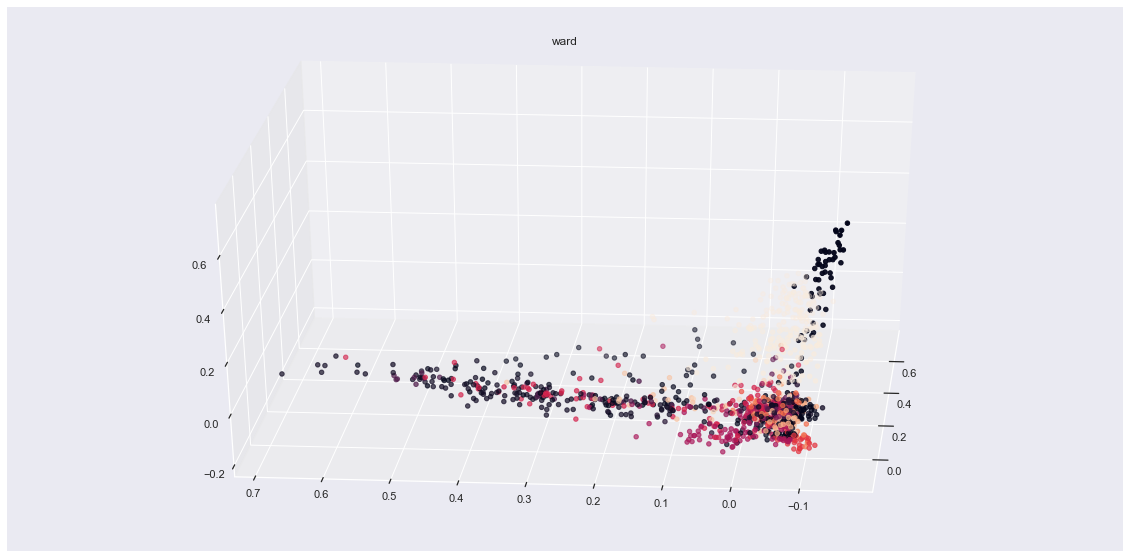

In [156]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_df['x'], PCA_df['y'], PCA_df['z'],c = PCA_df['HC'], marker = 'o')
ax.view_init(30, 185)
plt.title('ward')
plt.show()


### silhouette_score

In [160]:
silhouette_scores = []
for i in tqdm_notebook(range(2,30)):
    clustering = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=i)
    clusters = clustering.fit_predict(DTM_TFIDF)
    silhouette_scores.append(silhouette_score(DTM_TFIDF,clusters))

Text(0, 0.5, 'silhouette score')

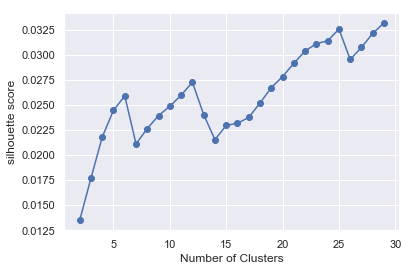

In [161]:
number_clusters =range(2,30)
plt.plot(number_clusters,silhouette_scores, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette score')
## 클러스터 수가 22

In [162]:
silhouette_scores_comp = []
for i in tqdm_notebook(range(2,30)):
    clustering = AgglomerativeClustering(linkage='complete', affinity='cosine', n_clusters=i)
    clusters = clustering.fit_predict(DTM_TFIDF)
    silhouette_scores_comp.append(silhouette_score(DTM_TFIDF,clusters))

Text(0, 0.5, 'silhouette score')

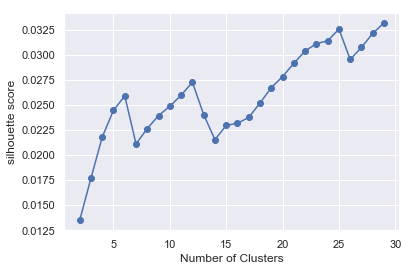

In [163]:
number_clusters =range(2,30)
plt.plot(number_clusters,silhouette_scores, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette score')

### DBSCAN

In [33]:
from sklearn.cluster import DBSCAN

In [84]:
clustering = DBSCAN(eps=0.7, min_samples=2).fit(DTM_TFIDF)

In [85]:
clustering.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [86]:
unique, counts = np.unique(clustering.labels_, return_counts=True)
dict(zip(unique, counts))

{-1: 1532,
 0: 3,
 1: 2,
 2: 2,
 3: 2,
 4: 5,
 5: 2,
 6: 4,
 7: 2,
 8: 2,
 9: 3,
 10: 3,
 11: 3,
 12: 2,
 13: 5,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 2,
 20: 2,
 21: 4,
 22: 2,
 23: 2,
 24: 2,
 25: 2,
 26: 2,
 27: 2,
 28: 2,
 29: 2,
 30: 2,
 31: 2,
 32: 3,
 33: 3,
 34: 2,
 35: 2,
 36: 2,
 37: 2,
 38: 2,
 39: 2,
 40: 4,
 41: 2,
 42: 4,
 43: 2,
 44: 2,
 45: 2,
 46: 2,
 47: 2,
 48: 2,
 49: 3,
 50: 2,
 51: 2,
 52: 2,
 53: 13,
 54: 2,
 55: 3,
 56: 2,
 57: 2,
 58: 2,
 59: 4,
 60: 3,
 61: 2,
 62: 2,
 63: 2,
 64: 2,
 65: 4,
 66: 2,
 67: 2,
 68: 2,
 69: 3,
 70: 2,
 71: 3,
 72: 2,
 73: 3}

In [87]:
PCA_df['DBS'] = clustering.labels_
PCA_df.head()

,x,y,z,k-means,DBS
0,-0.083218,0.033620,-0.000171,1,-1
1,-0.057687,-0.074003,-0.001675,4,-1
2,-0.082954,-0.043982,-0.029408,15,-1
3,-0.072713,-0.081996,-0.001800,4,0
4,0.109775,0.171307,-0.001310,5,-1


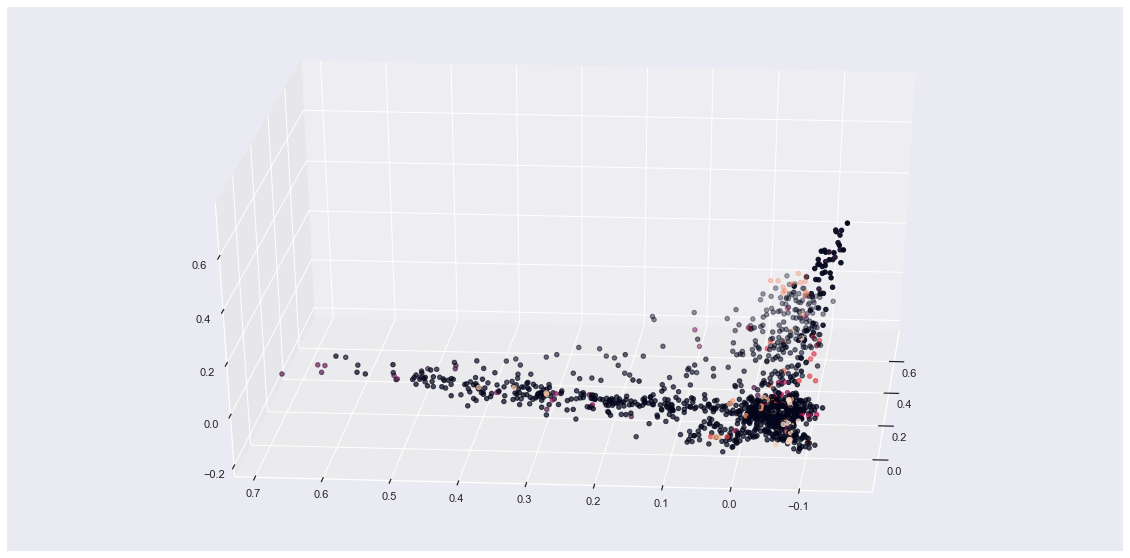

In [88]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_df['x'], PCA_df['y'], PCA_df['z'],c = PCA_df['DBS'], marker = 'o')
ax.view_init(30, 185)
plt.show()

Standard Scaler를 통한 스케일링

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
X = StandardScaler().fit_transform(DTM_TFIDF)

In [36]:
clustering2 = DBSCAN(eps=0.9, min_samples=4, metric='cosine').fit(X)

In [37]:
PCA_df['DBS'] = clustering2.labels_
unique, counts = np.unique(clustering2.labels_, return_counts=True)
dict(zip(unique, counts))

NameError: name 'PCA_df' is not defined

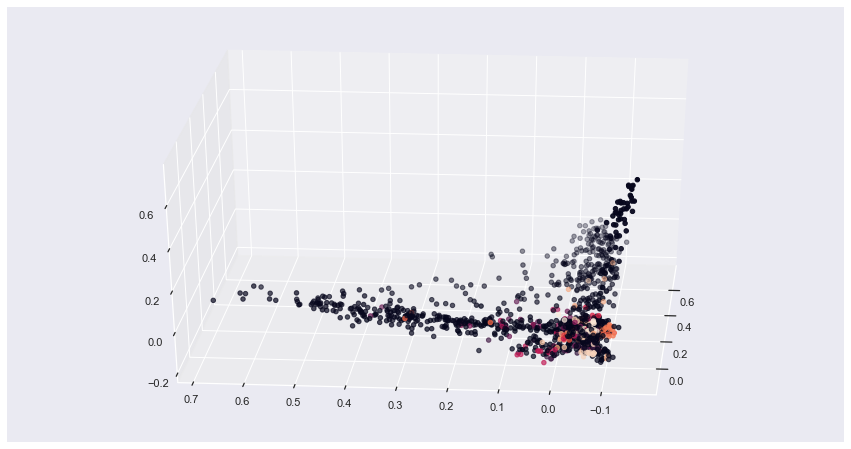

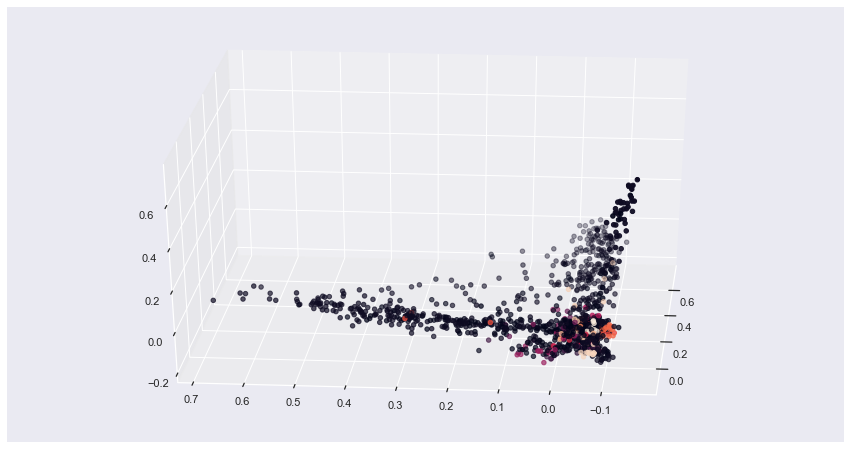

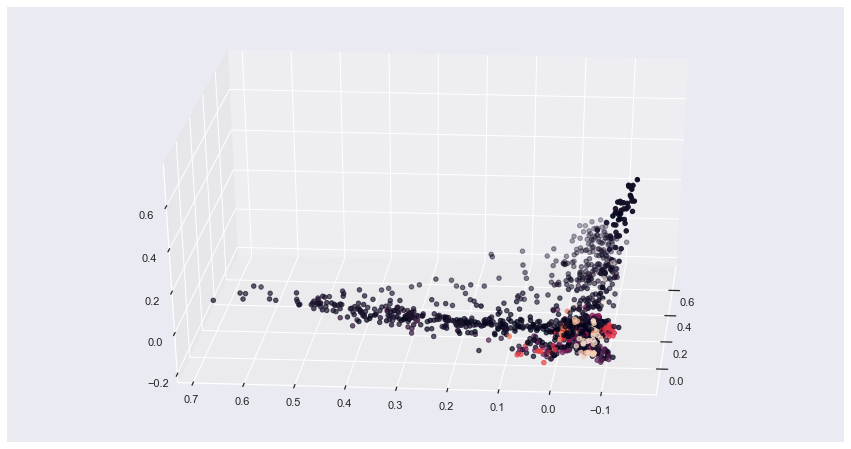

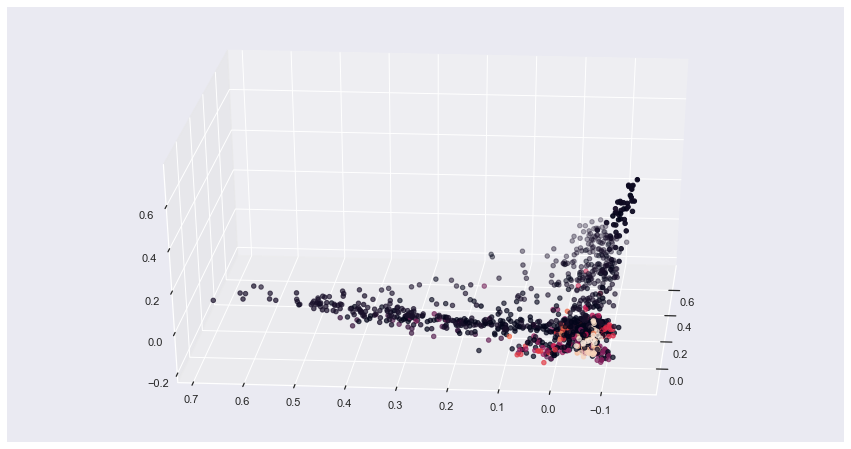

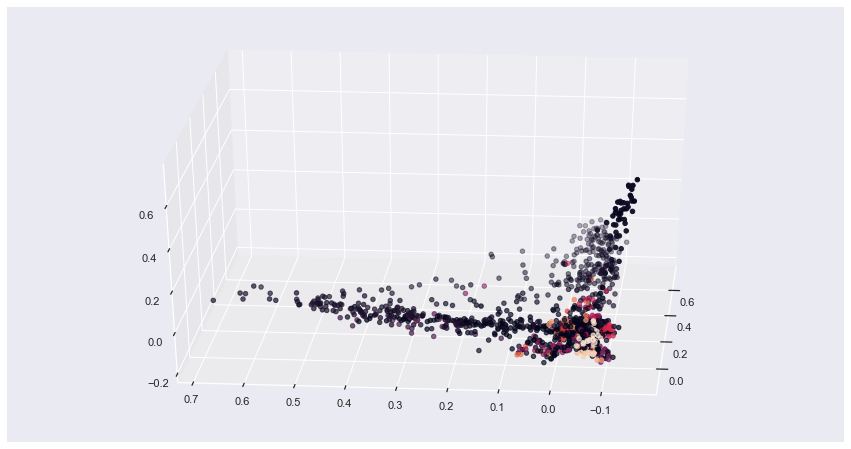

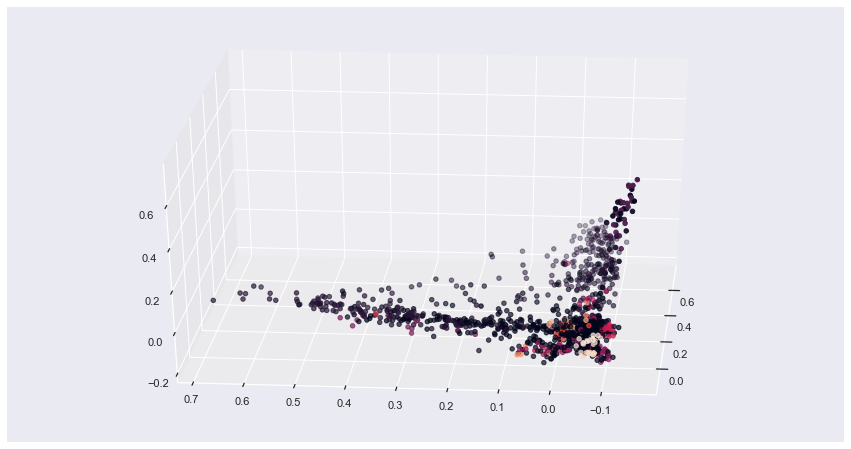

In [193]:
for i in range(2,8):
    eps = 0.83
    clustering2 = DBSCAN(eps= eps, min_samples=i, metric='cosine').fit(X)

    PCA_df['DBS'] = clustering2.labels_

    fig = plt.figure(figsize = (15,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(PCA_df['x'], PCA_df['y'], PCA_df['z'],c = PCA_df['DBS'], marker = 'o')
    ax.view_init(30, 185)
    
    plt.show()

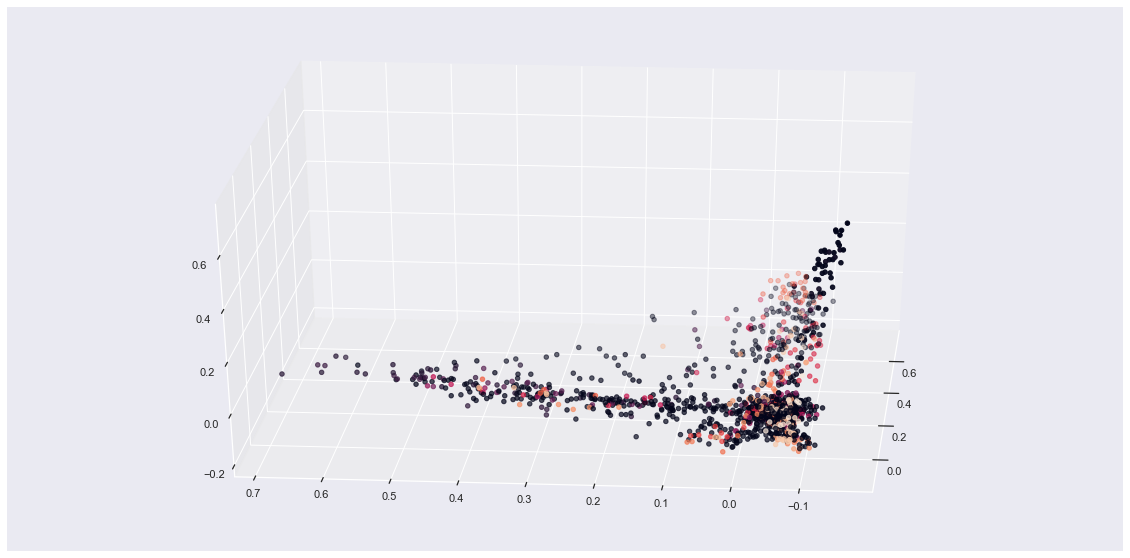

In [265]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_df['x'], PCA_df['y'], PCA_df['z'],c = PCA_df['DBS'], marker = 'o')
ax.view_init(30, 185)
plt.show()

### silhouette score

In [259]:
for i in tqdm_notebook(np.arange(0.65,0.9,0.01)):
    for j in range(2,10):
        
        clustering2 = DBSCAN(eps= i, min_samples=j, metric='cosine').fit(X)
        clusters = clustering2.fit_predict(DTM_TFIDF)
        print('eps: ', i, 'min_saples: ', j, 'score: ', silhouette_score(DTM_TFIDF,clusters))
    print()
        

eps:  0.65 min_saples:  2 score:  0.05919546266295526
eps:  0.65 min_saples:  3 score:  0.0487975722323347
eps:  0.65 min_saples:  4 score:  0.03947876383973878
eps:  0.65 min_saples:  5 score:  0.035695452599794834
eps:  0.65 min_saples:  6 score:  0.03235412552253069
eps:  0.65 min_saples:  7 score:  0.028637392686190467
eps:  0.65 min_saples:  8 score:  0.02583426489751497
eps:  0.65 min_saples:  9 score:  0.02538499945260113

eps:  0.66 min_saples:  2 score:  0.05493667848563442
eps:  0.66 min_saples:  3 score:  0.04973910826507507
eps:  0.66 min_saples:  4 score:  0.04147935686286539
eps:  0.66 min_saples:  5 score:  0.03716296096432295
eps:  0.66 min_saples:  6 score:  0.03316885567307235
eps:  0.66 min_saples:  7 score:  0.030060136093209962
eps:  0.66 min_saples:  8 score:  0.026927528662011903
eps:  0.66 min_saples:  9 score:  0.02304715303351559

eps:  0.67 min_saples:  2 score:  0.05242961239669066
eps:  0.67 min_saples:  3 score:  0.04770943078622196
eps:  0.67 min_saples: 